# Uniform Random Recommendation Paired Test Case Study


## Objective
adding uniform random exploration (ε-greedy strategy) to a popularity biased movie recommendation system improves user satisfaction or not.

## Statistical Test
I use a paired t-test to compare the average reward per user before and after the intervention.

In [3]:
# mount google drive to acess dataset
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import random
from scipy.stats import ttest_rel # for paired t-test
import matplotlib.pyplot as plt


# Data Loading and Preprocessing

In [ ]:
file_path = '/content/drive/MyDrive/ratings.dat'
ratings = pd.read_csv(file_path, sep='::', engine='python', header=None,
                           names=['UserID', 'MovieID', 'Rating', 'Timestamp'])

# display first few rows to verify data loading
ratings.head()

In [ ]:
# convert ratings to  feedback (keep / no-keep)
# - reward = 1 if rating >= 4 (kept the movie)
# - reward = 0 if rating < 4 (no keep)
ratings["reward"] = (ratings["Rating"] >= 4).astype(int)

In [ ]:
ratings.head()

,UserID,MovieID,Rating,Timestamp,reward
0,1,1193,5,978300760,1
1,1,661,3,978302109,0
2,1,914,3,978301968,0
3,1,3408,4,978300275,1
4,1,2355,5,978824291,1


# Identify Popular Movies

In [ ]:

# Count the number of ratings (interactions) per movie
# Movies with more ratings are considered more popular
movie_popularity = (
    ratings.groupby("MovieID")["reward"]
    .count()
    .sort_values(ascending=False)
)

# Select the top 50 most popular movies for the biased policy
TOP_K = 50
popular_movies = movie_popularity.head(TOP_K).index.tolist()
all_movies = ratings["MovieID"].unique().tolist()

In [ ]:
# display the total number of movies in the catalog
print("Total No of Movies :",len(all_movies))

NameError: name 'all_movies' is not defined

In [ ]:
user_movie_reward = {}

# Create a lookup table to quickly retrieve the reward for any user-movie pair
# This simulates the "ground truth" of whether a user would like a movie
for row in ratings.itertuples():
    key = (row.UserID, row.MovieID)
    user_movie_reward[key] = row.reward


NameError: name 'ratings' is not defined

#Reward Function

In [ ]:
def get_reward(user, movie):

    return user_movie_reward.get((user, movie), 0)

# Biased Recommendation Policy

In [ ]:
def biased_policy():

    return random.choice(popular_movies)

## Simulation Setup

In [ ]:
user_activity = ratings.groupby("UserID").size()

# Filter for active users (those with at least 40 ratings)
active_users = user_activity[user_activity >= 40].index.tolist()

print("Active Users:",len(active_users))

N_USERS = 400
users = random.sample(active_users, N_USERS)
# Each user will receive 30 movie recommendations
INTERACTIONS = 30



Active Users: 4737


## Simulation: Before

In [ ]:
before_rewards = []

for user in users:
    rewards = []
    for _ in range(INTERACTIONS):
        movie = biased_policy()
        rewards.append(get_reward(user, movie))
     # Calculate average reward for this user
    before_rewards.append(np.mean(rewards))

## Simulation: After (ε-Greedy Policy)

In [ ]:
# Set exploration rate: 5% of recommendations will be uniform random
EPSILON = 0.05
after_rewards = []

for user in users:
    rewards = []
    for _ in range(INTERACTIONS):

        if random.random() < EPSILON:
            movie = random.choice(all_movies)     # EXPLORATION
        else:
            movie = biased_policy()              # EXPLOITATION
        rewards.append(get_reward(user, movie))
    after_rewards.append(np.mean(rewards))

## Statistical Analysis: Paired T-Test

In [ ]:
# null hypothesis = after mean-before mean=0
# alternative hypothesis = after mean-before mean !=0

In [ ]:
before = np.array(before_rewards)
after = np.array(after_rewards)

t_stat, p_value = ttest_rel(after, before)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Mean Lift: {np.mean(after - before)}")

T-statistic: -2.5546
P-value: 0.011002
Mean Lift: -0.0143


- If P-value < 0.05 (Statistically Significant)
Conclusion: The 5% exploration strategy made a real difference.

- If P-value > 0.05 (Not Significant)
Conclusion: The results are inconclusive.



In [ ]:
alpha = 0.05  # alpha level
if p_value < alpha:
    print(f" P-value ({p_value}) < {alpha}")
    print(" Result is statistically significant")
    print(" We REJECT the null hypothesis")

    if t_stat > 0:
        print(" The ε-greedy policy IMPROVES user satisfaction")
    else:
        print(" The ε-greedy policy DECREASES user satisfaction")
else:
    print(f" P-value ({p_value}) >= {alpha}")
    print(" Result is NOT statistically significant")
    print(" We FAIL TO REJECT the null hypothesis")
    print(" No significant difference between the policies")

 P-value (0.011002) < 0.05
 Result is statistically significant
 We REJECT the null hypothesis
 The ε-greedy policy DECREASES user satisfaction


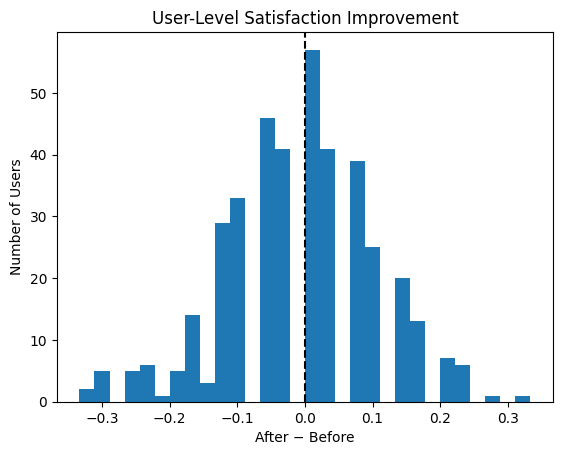

In [ ]:
plt.hist(after - before, bins=30)
plt.axvline(0, linestyle="--", color="black")
plt.title("User-Level Satisfaction Improvement")
plt.xlabel("After − Before")
plt.ylabel("Number of Users")
plt.show()


# FINAL CONCLUSION

In [ ]:

print(" "*20 + "FINAL CONCLUSION")

print(" EXPERIMENT DESIGN:")
print(f"   • Sample Size: {N_USERS} active users")
print(f"   • Interactions per User: {INTERACTIONS} recommendations")
print(f"   • Exploration Rate (ε): {EPSILON*100}%")
print(f"   • Popular Movies Pool: Top {TOP_K} movies")
print(f"   • Total Movies Catalog: {len(all_movies)} movies")

print(" BASELINE PERFORMANCE (Pure Popularity Bias):")
print(f"   • Mean Reward: {np.mean(before)}")
print(f"   • Std Deviation: {np.std(before)}")

print(" NEW POLICY PERFORMANCE (ε-Greedy with Uniform Exploration):")
print(f"   • Mean Reward: {np.mean(after)}")
print(f"   • Std Deviation: {np.std(after)}")

print(" STATISTICAL TEST RESULTS:")
print(f"   • T-statistic: {t_stat}")
print(f"   • P-value: {p_value}")
print(f"   • Mean Lift: {np.mean(after - before)} ({np.mean(after - before)/np.mean(before)*100}% relative change)")
print(f"   • Significance Level (α): 0.05")

                    FINAL CONCLUSION
 EXPERIMENT DESIGN:


NameError: name 'N_USERS' is not defined

The Mean Lift is the most important number for the business. It is calculated as:{Mean Lift} = {Average}(After) - {Average}(Before)

- If Lift is 0.05:  new strategy increased the "Keep Rate" by 5%.
- The Relationship: The T-test tells you if the Lift is real, but the Mean Lift tells you if the change is useful.

Example: You could have a P-value of 0.001 (very real) but a Mean Lift of only 0.00001 (not useful for business).